In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers
import matplotlib.pyplot as plt

In [11]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [14]:
classes[9]

'truck'

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    # plt.axis('off')
    plt.xlabel(classes[y[index]])
    plt.show

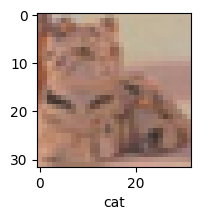

In [16]:
plot_sample(X_train, y_train,6700)

In [17]:
X_train_scaled = (X_train / 255.0).astype('float32')
X_test_scaled = (X_test / 255.0).astype('float32')


In [29]:
ANN = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),

    keras.layers.Dense(10, activation='sigmoid')
])

ANN.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN.fit(X_train_scaled, y_train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3065 - loss: 1.9297
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4160 - loss: 1.6539
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4550 - loss: 1.5486
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4763 - loss: 1.4902
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4953 - loss: 1.4314
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5109 - loss: 1.3882
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5254 - loss: 1.3585
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5370 - loss: 1.3167
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5555 - loss: 1.2650
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5624 - loss: 1.2481


In [30]:
classes[np.argmax(ANN.predict(X_test_scaled)[3])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'airplane'

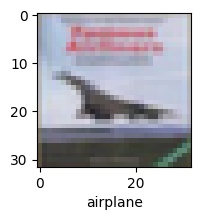

In [31]:
plot_sample(X_test,y_test,3)

In [32]:
ANN.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5094 - loss: 1.3914


[1.4010201692581177, 0.5008000135421753]

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ANN.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.66      0.54      1000
           1       0.71      0.56      0.63      1000
           2       0.37      0.49      0.42      1000
           3       0.39      0.26      0.31      1000
           4       0.47      0.34      0.39      1000
           5       0.68      0.14      0.23      1000
           6       0.41      0.76      0.53      1000
           7       0.66      0.51      0.57      1000
           8       0.59      0.69      0.63      1000
           9       0.56      0.61      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.48     10000
weighted avg       0.53      0.50      0.48     10000



In [36]:
CNN = keras.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # ANN
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
CNN.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3520 - loss: 1.7629
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5760 - loss: 1.2047
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6394 - loss: 1.0383
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6757 - loss: 0.9401
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6902 - loss: 0.8869
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7094 - loss: 0.8294
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7245 - loss: 0.7957
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7393 - loss: 0.7521
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7476 - loss: 0.7203
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7579 - loss: 0.6901


In [34]:
classes[np.argmax(CNN.predict(X_test_scaled)[3])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


'airplane'

In [40]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = CNN.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.81      0.79      0.80      1000
           2       0.53      0.65      0.58      1000
           3       0.51      0.51      0.51      1000
           4       0.69      0.62      0.66      1000
           5       0.55      0.67      0.61      1000
           6       0.80      0.72      0.76      1000
           7       0.73      0.75      0.74      1000
           8       0.82      0.79      0.80      1000
           9       0.82      0.72      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

